<a href="https://colab.research.google.com/github/Kabaaaan/-Introduction-to-AI/blob/main/Intro_to_AI_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Генетический алгоритм: отбор, скрещивание, мутация - Имитация эволючионного процесса.

ГА хорошо применим к задачам, которые сложно формализовать математически, также они хорошо восприимчивы к шуму. Но сложность в формализации исходной задачи в терминах "ген", "хромосома", "оператор отбора".

ГА не гарантирует нахождение оптимального решения, т.к. особь может быстро получить более менее хороший набор генов и потянуть за собой остальных.


Популяция - начальный набор данных (множество особей одного вида). Особи имеют хромосомы, которые состоят из генов.


Функция приспособленности (целевая функция) - получение лучшего решениия, т.е. наиболее приспособленных особей - fitness(individ).



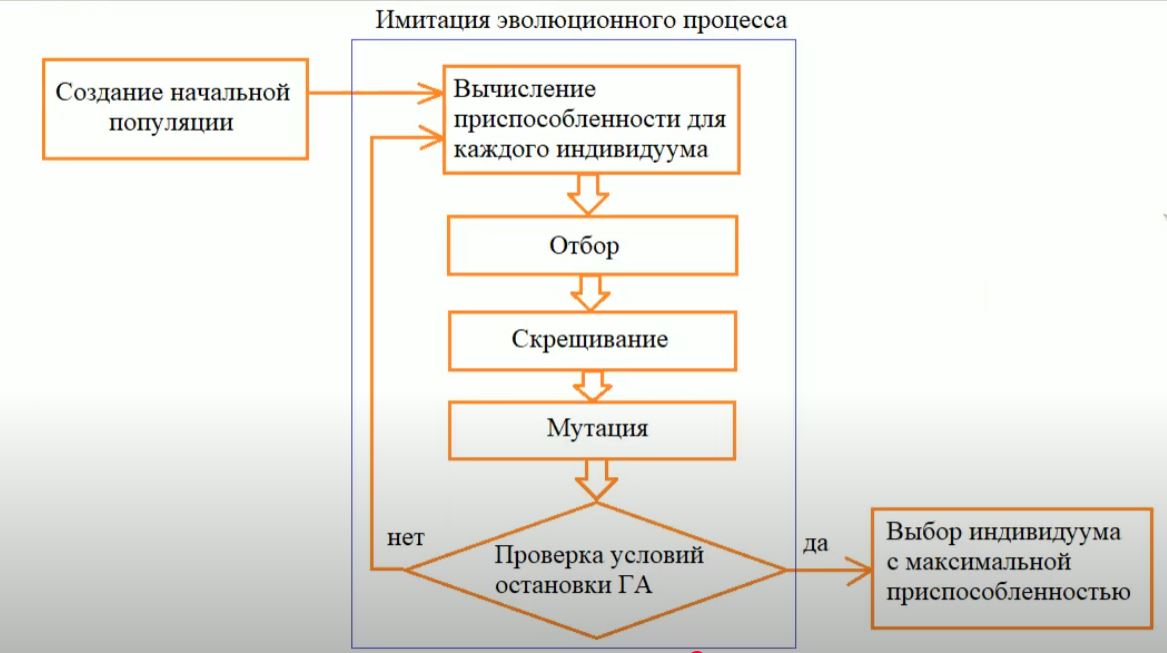

Отбор - сохранение наиболее приспособленных, при этом сохранение разнообразия генов популяции, чтобы не потерять важные гены.
1. Правило рулетки - чем выше приспособленность, тем выше процент дать потомство (случайным образом крутим круг).
2. Стохастическая универсальная выборка - как рулетка, но точек отбора несколько и онии распределены равномерно по кругу.
3. Ранжированный отбор - как рулетка, но сектора круга это не проценты приспособленности, а ранги, которые получены на основе приспособленности.
4. Масштабирование приспособленности - как ранжированный, но не ранги, а масштабирование на выбранном диапазоне.
5. Турнирный отбор - берем случайно N особей, среди них выбираем сильнейшего, он и попадает в число родителей. Это наилучший метод, сохраняющий разнообразие поплуляции.

Скрещивание - обмен данными между частями хромомсом двух родителей. Родители, давшие потомство, не переходят в следующее покеоление, а не давшие - переходят. Скрещивание имеет вероятность, но очень большую.

1. Одноточечное - случайным образом определяем место разреза хромосомы, затем меняя части хромосом, мы поулчаем две новые особи - детей.
2. Двухточечное (k-точечное) - аналогие с одноточечным.
3. Равномерное - случайно выбираем ген и с определенной вероятностью меняем эти гены у родителей и в итоге получаем потомков.
4. Упорядоченное - для задач, где недопустимо повторение генов в хромосоме.
5. Скрещивание смешением - для генов, которые представлены вещественными числами.

Мутация - случайным образом с минимальной вероятностью меняет один или несколько генов потомка. Мутация либо улучшает решение, либо ухудшает, но такой потомок не выживет на следующей иттерации алгоритма.

1. Инвертирование битов - простая замена случайного бита с случайной вероятностью.
2. Мутация обменом - для задач, где недопустимо повторение генов в хромосоме. Случайным образом выбираем два гена и меняем их местами.
3. Мутация обращением - выбирается случайная последовательность соседних генов хромосомы и они записываются в обратном порядке.
4. Мутация перетасовкой - выбирается случайная последовательность соседних генов хромосомы и они записываются в случайном порядке.

**DEAP** - базовый пакет для создания генетических алгоритмов на питоне. Все описанные методы отбора, скрещивание и мутации представлены в DEAP.

**Вариант 17**

Строковая эволюция. С помощью ГА восстановите целевую строку «ГЕНЕТИЧЕСКИЕ АЛГОРИТМЫ» из случайной популяции. Алфавит — заглавные русские буквы и пробел; фитнесс — отрицательная метрика Хэмминга.

In [ ]:
!pip install deap

In [88]:
from deap import base, algorithms
from deap import creator
from deap import tools

import random
import matplotlib.pyplot as plt
import numpy as np

In [163]:
# @title Исходники

# константы задачи
TARGET_STRING = "ГЕНЕТИЧЕСКИЕ АЛГОРИТМЫ"
TARGET_STRING_LENGTH = len(TARGET_STRING)
TARGET_STRING_LIST = [char for char in TARGET_STRING]
GENE_SET = "АБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ "
GENE_SET_LIST = [char for char in GENE_SET]

# константы генетического алгоритма
POPULATION_SIZE = 100
P_CROSSOVER = 0.9
P_MUTATION = 0.1
MAX_GENERATIONS = 150
ELITE_SIZE = 1

In [ ]:
# @title Генетический алгоритм

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

def fitnessHamming(individual):
    similarity = 0
    for i in range(TARGET_STRING_LENGTH):
        if individual[i] == TARGET_STRING_LIST[i]:
            similarity += 1
    return similarity,


def mutate_string(individual, indpb=0.1):
    for i in range(len(individual)):
        if random.random() < indpb:
            if individual[i] != TARGET_STRING[i]:
                if random.random() < 0.7:
                    individual[i] = random.choice(GENE_SET_LIST)
            else:
                if random.random() < 0.02:
                    individual[i] = random.choice(GENE_SET_LIST)
    return individual,


toolbox = base.Toolbox()
toolbox.register("attr_gene", random.choice, GENE_SET_LIST)
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.attr_gene, TARGET_STRING_LENGTH)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

population = toolbox.populationCreator(n=POPULATION_SIZE)

toolbox.register("evaluate", fitnessHamming)
toolbox.register("select", tools.selTournament, tournsize=5)
toolbox.register("mate", tools.cxOnePoint)  # tools.cxUniform, indpb=0.5   работал чуть-чуть хуже
toolbox.register("mutate", mutate_string)

hall_of_fame = tools.HallOfFame(ELITE_SIZE)

stats = tools.Statistics(lambda ind: ind.fitness.values[0])
stats.register("max", np.max)
stats.register("avg", np.mean)
# neavls - кол-во вызовов функции отбора в данном поколении.

population, logbook = algorithms.eaSimple(population, toolbox,
                                        cxpb=P_CROSSOVER,
                                        mutpb=P_MUTATION,
                                        ngen=MAX_GENERATIONS,
                                        stats=stats,
                                        halloffame=hall_of_fame,
                                        verbose=True)

maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

plt.plot(maxFitnessValues, color='red', label='Максимальная приспособленность')
plt.plot(meanFitnessValues, color='green', label='Средняя приспособленность')
plt.legend(loc='lower right')
plt.xlabel('Поколение')
plt.ylabel('Приспособленность')
plt.title('Зависимость максимальной и средней приспособленности от поколения')
plt.show()

best_ind = hall_of_fame[0]
best_string = ''.join(best_ind)
print(f"Лучшее решение: {best_string}")
print(f"Приспособленность: {int(best_ind.fitness.values[0])}/{TARGET_STRING_LENGTH}")

In [ ]:
# @title Демонстрация элитизма

def compare_elitism_multiple_runs(num_runs=10):
    results = {
        'with_elitism': [],
        'without_elitism': [],
        'elitism_wins': 0,
        'equal': 0,
        'no_elitism_wins': 0
    }

    for run in range(num_runs):
        print(f"Запуск {run + 1}/{num_runs}...")

        population_no_elite = toolbox.populationCreator(n=POPULATION_SIZE)
        _, logbook_no_elite = algorithms.eaSimple(
            population_no_elite, toolbox,
            cxpb=P_CROSSOVER,
            mutpb=P_MUTATION,
            ngen=MAX_GENERATIONS,
            stats=stats,
            verbose=False
        )
        best_no_elite = max([ind.fitness.values[0] for ind in population_no_elite])

        population_elite = toolbox.populationCreator(n=POPULATION_SIZE)
        hall_of_fame = tools.HallOfFame(ELITE_SIZE)
        _, logbook_elite = algorithms.eaSimple(
            population_elite, toolbox,
            cxpb=P_CROSSOVER,
            mutpb=P_MUTATION,
            ngen=MAX_GENERATIONS,
            stats=stats,
            halloffame=hall_of_fame,
            verbose=False
        )
        best_with_elite = hall_of_fame[0].fitness.values[0]

        results['without_elitism'].append(best_no_elite)
        results['with_elitism'].append(best_with_elite)

        if best_with_elite > best_no_elite:
            results['elitism_wins'] += 1
        elif best_with_elite == best_no_elite:
            results['equal'] += 1
        else:
            results['no_elitism_wins'] += 1


    print(f"Победы элитизма: {results['elitism_wins']} ({results['elitism_wins']/num_runs*100:.1f}%)")
    print(f"Ничьи: {results['equal']} ({results['equal']/num_runs*100:.1f}%)")
    print(f"Победы без элитизма: {results['no_elitism_wins']} ({results['no_elitism_wins']/num_runs*100:.1f}%)")

    avg_with = np.mean(results['with_elitism'])
    avg_without = np.mean(results['without_elitism'])
    print(f"\nСредняя приспособленность с элитизмом: {avg_with:.2f}")
    print(f"Средняя приспособленность без элитизма: {avg_without:.2f}")
    print(f"Улучшение: {avg_with - avg_without:.2f} ({((avg_with/avg_without)-1)*100:.1f}%)")

    categories = ['Элитизм\nпобедил', 'Ничьи', 'Без элитизма\nпобедил']
    values = [results['elitism_wins'], results['equal'], results['no_elitism_wins']]
    plt.bar(categories, values, color=['green', 'blue', 'red'])
    plt.title('Соотношение побед')
    plt.ylabel('Количество запусков')

    plt.tight_layout()
    plt.show()

    return results

results = compare_elitism_multiple_runs(num_runs=15)